<a href="https://colab.research.google.com/github/DantonCoote/My_Hub/blob/DeepLearning/Assign_2_Group_9_NNDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2, Fruit Classification

## Step 1.1, Loading and cleaning our Data

In [1]:
import pandas as pd

#beginning by loading our data
data = pd.read_csv('Date_Fruit_Datasets.csv')
data.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


There is a lot of data here! 34 columns and we see that there is some large deviations in our data, this is good as it will make training a classifier easier.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

Looking good for our data, no null values should be within it and we have a label known as Class that will help train accuracy

In [3]:
#Checking for duplicates
dups = data.duplicated()
for i in dups:
  if i == True:
    print("There are duplicates")
    break

With no output we can assume there are no duplicates

## Step 1.2, Data Exploration

<Axes: >

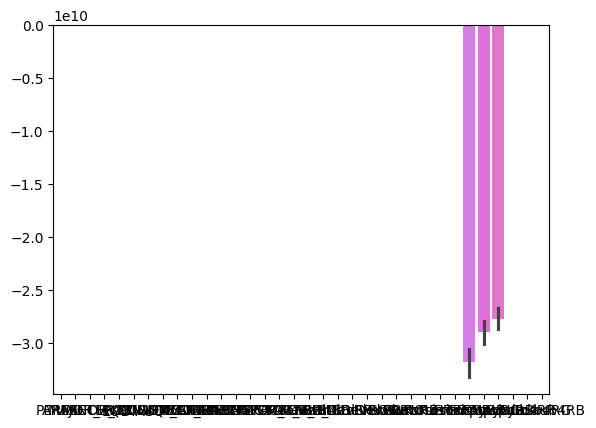

In [4]:
import seaborn as sb

sb.barplot(data)

This bar plot, though weird looking, shows that our data is not very well scaled. We have a wide variety of ranges for our numerical data which makes our bar plot seeem very scewed. We will need to scale the data before using it train a model or else we will have very inaccurate results (Speaking from experience)

In [5]:
#moving labels to dataframe
labels = data['Class']

#dropping labels from original dataframe
data_mod = data.drop('Class', axis=1)

# reshaping dataframe to 2D array
labelsnp = labels.to_numpy().reshape((-1, 1))
labels.shape

(898,)

In [6]:
# Confirming
print(data_mod.info)
labels[:5]

<bound method DataFrame.info of        AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0    422163  2378.9080    837.8484    645.6693        0.6373  733.1539   
1    338136  2085.1440    723.8198    595.2073        0.5690  656.1464   
2    526843  2647.3940    940.7379    715.3638        0.6494  819.0222   
3    416063  2351.2100    827.9804    645.2988        0.6266  727.8378   
4    347562  2160.3540    763.9877    582.8359        0.6465  665.2291   
..      ...        ...         ...         ...           ...       ...   
893  255403  1925.3650    691.8453    477.1796        0.7241  570.2536   
894  365924  2664.8230    855.4633    551.5447        0.7644  682.5752   
895  254330  1926.7360    747.4943    435.6219        0.8126  569.0545   
896  238955  1906.2679    716.6485    441.8297        0.7873  551.5859   
897  343792  2289.2720    823.8438    534.7757        0.7607  661.6113   

     SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  SkewRB  KurtosisRR  \
0 

,Class
0,BERHI
1,BERHI
2,BERHI
3,BERHI
4,BERHI


Everything looks good! We can move to the next phase of development.

# Step 1.3, Scaling our data

In [7]:
from sklearn import preprocessing

#initializing a scaler
scalar = preprocessing.MinMaxScaler()

# Scaling data
scaled_data = scalar.fit_transform(data_mod)

We are scaling the data to ensure all our datapoints are on the same scale, standardizing all the measurements of the dataset.

In [8]:
from sklearn import model_selection

# splitting our data into training, validation, and testing variables
# splitting
train_x, rem_x, train_y, rem_y = model_selection.train_test_split(scaled_data, labels, train_size=0.8)
test_x, val_x, test_y, val_y = model_selection.train_test_split(rem_x, rem_y, train_size=0.5)

## Step 2.1, Model Selection and Training

In [9]:
#First off I need to know how many unique classes we have!
labels.unique() # this shows 7 unique entries
#This affects how dense our last layer needs to be!

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [10]:
#Time to initialize an initial model
from keras import models
model = models.Sequential()

In [11]:
# beginning the building of our NN
import keras
model.add(keras.layers.Input(shape=scaled_data.shape))
model.add(keras.layers.Dense(units=340, activation='relu'))
model.add(keras.layers.Dense(units=680, activation='softmax'))
model.add(keras.layers.Flatten())
#model.add(keras.layers.Conv2D(filters=34, kernel_size=(17,17), activation='softmax'))

SyntaxError: invalid syntax (<ipython-input-12-e5c9403477cf>, line 1)